In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.interactive import *

INFO     2017-05-08 16:46:00,229 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
ncf = NCFile('/artemis/readout/2017-05-08_160629_mmw_sweep_lo_1250.0.nc',cache_s21_raw=True)

In [4]:
mmwsl = ncf.MMWSweepList0

In [5]:
df = mmwsl.to_dataframe()

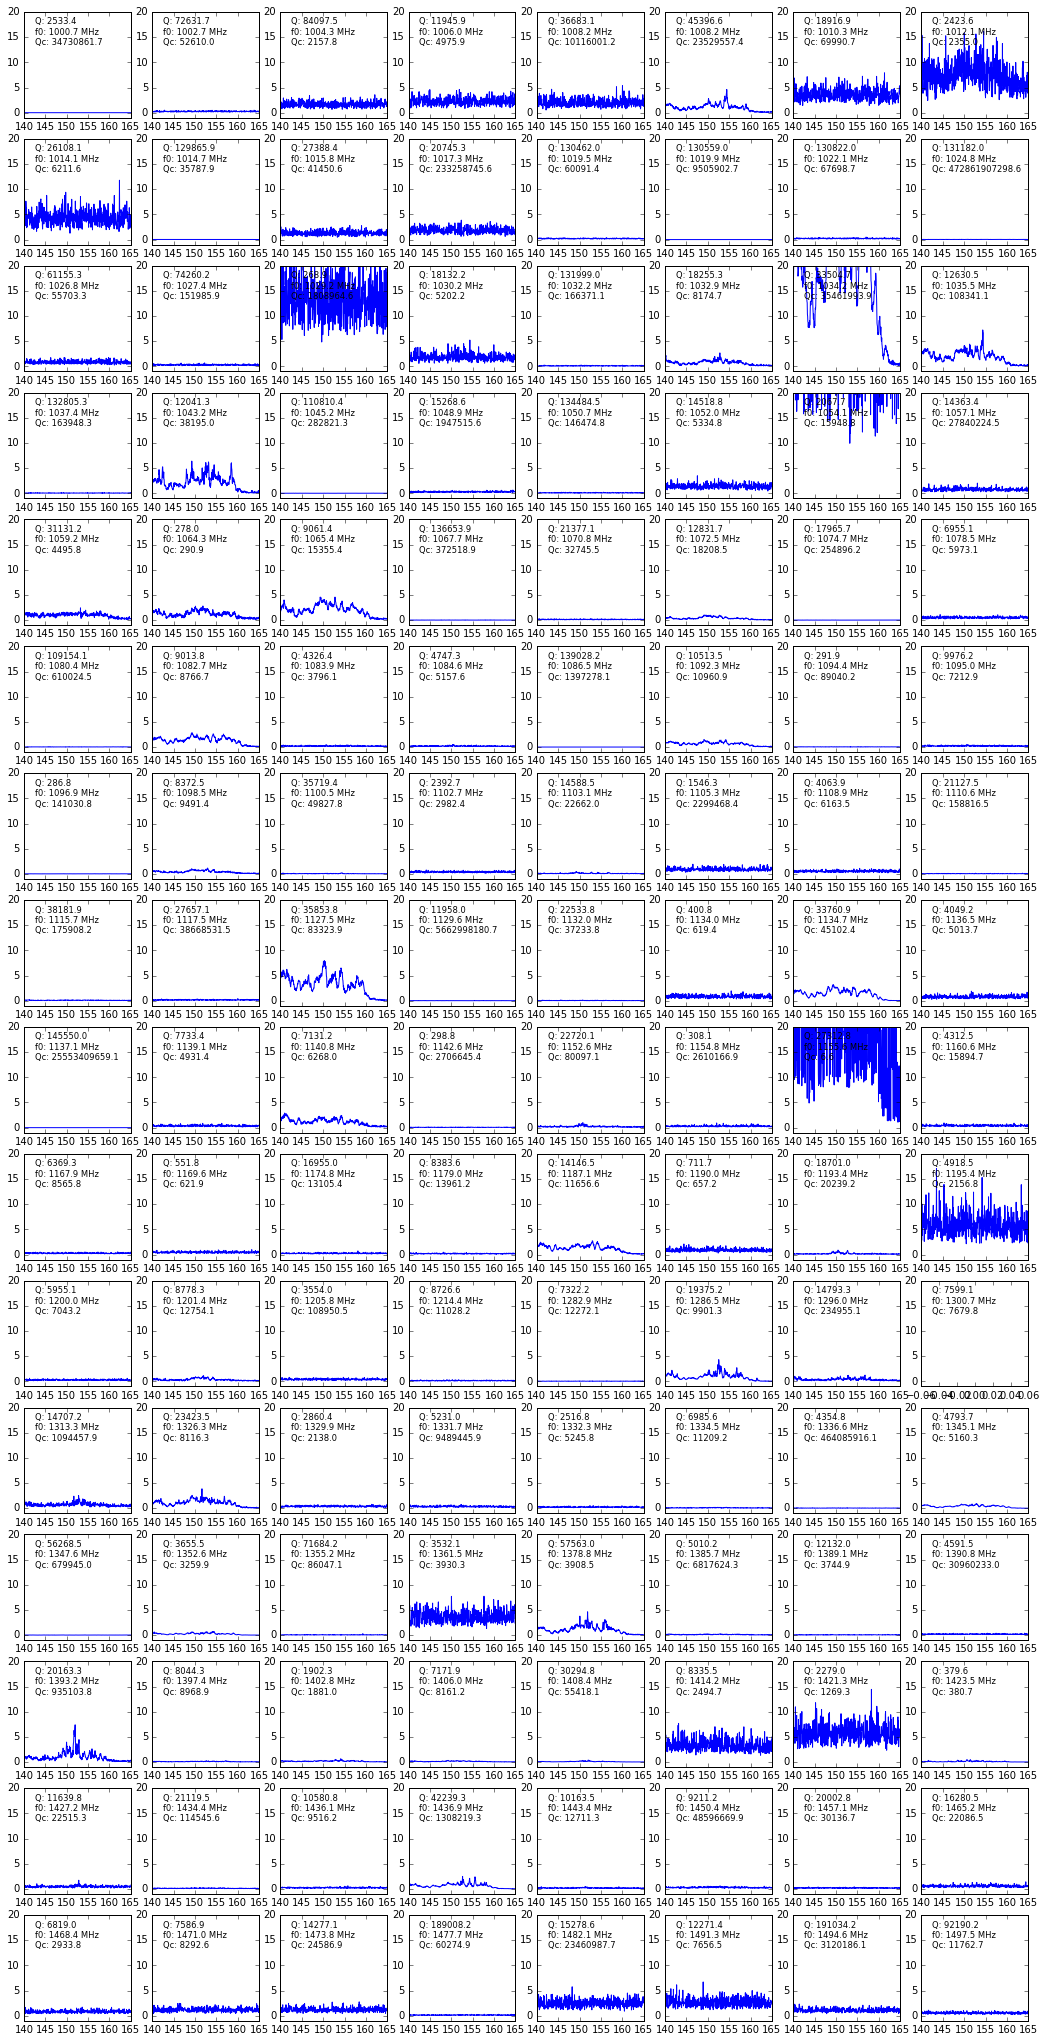

In [6]:
fig,axs = subplots(16,8,figsize=(18,36))
for k,row in df.iterrows():
    ax = axs.flatten()[k]
    try:
        ax.plot(row.mmw_frequency/1e9,1e6*row.fractional_frequency_response)
        ax.text(0.1,0.95,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()])),
               transform=ax.transAxes,size='small',va='top')
    except ValueError:
        pass
    ax.set_ylim(-1,20)

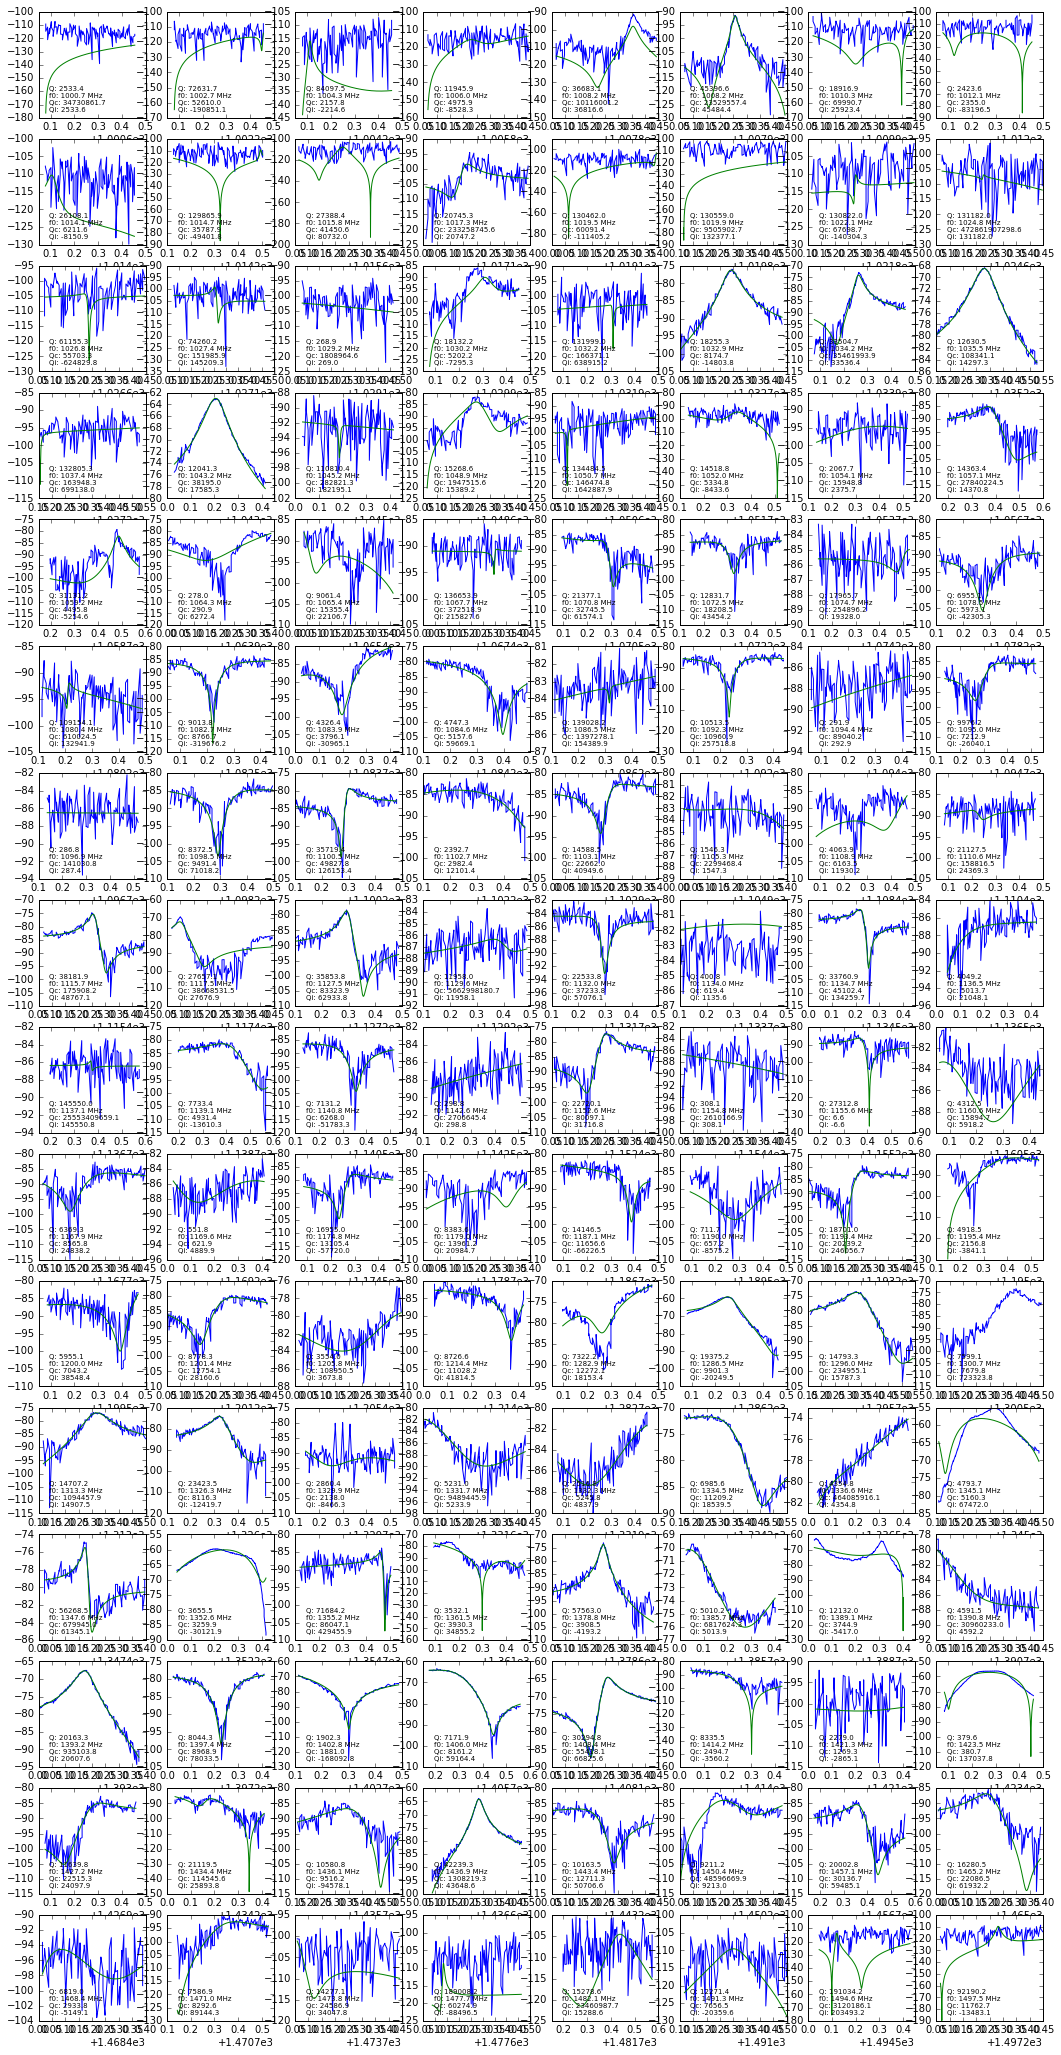

In [7]:
fig,axs = subplots(16,8,figsize=(18,36))
for k,row in df.iterrows():
    ax = axs.flatten()[k]
    try:
        ax.plot(row.res_frequency_data/1e6,20*np.log10(np.abs(row.res_s21_data)))
        ax.plot(row.res_model_frequency/1e6, 20*np.log10(np.abs(row.res_model_s21)))
        ax.text(0.1,0.05,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f\nQi: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()],
                         row.res_Q_i)),
               transform=ax.transAxes,size='x-small',va='bottom')
    except ValueError:
        pass

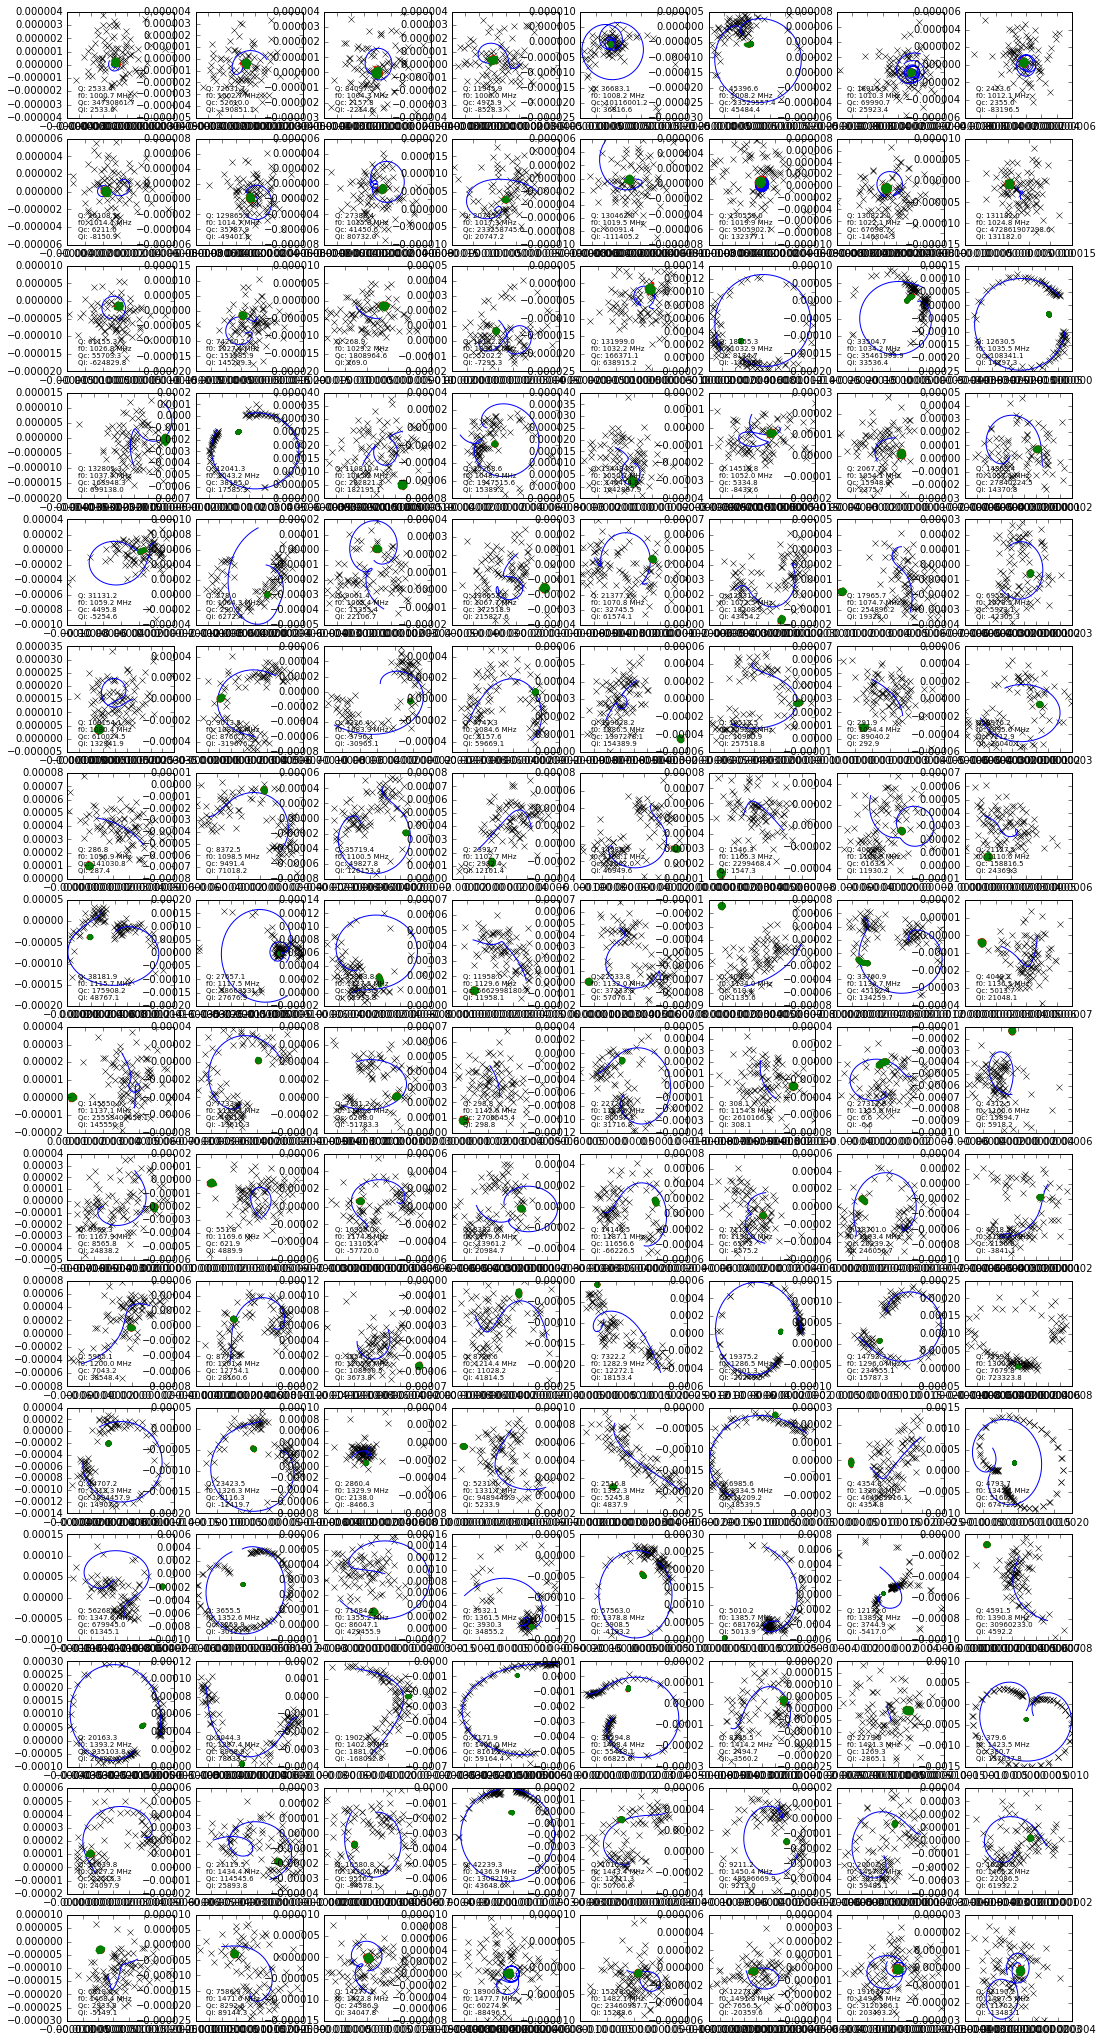

In [8]:
fig,axs = subplots(16,8,figsize=(18,36))
for k,row in df.iterrows():
    ax = axs.flatten()[k]
    try:
        plot_ri(row.res_s21_data,'kx',ax=ax)
        plot_ri(row.res_model_s21,ax=ax)
        plot_ri(row.folded_s21_raw[:,0],'r.',ax=ax)
        plot_ri(row.folded_s21_raw[:,128],'g.',ax=ax)
        
        ax.text(0.1,0.05,("Q: %.1f\nf0: %.1f MHz\nQc: %.1f\nQi: %.1f" %(row.res_Q,row.res_f_0/1e6,1/np.real(1/row.res_Q_e)[()],
                         row.res_Q_i)),
               transform=ax.transAxes,size='x-small',va='bottom')
    except ValueError:
        pass